# Apprentice Chef

After three years serving customers across the San Francisco Bay Area, the executives at
Apprentice Chef have come to realize that over 90% of their revenue comes from customers
that have been ordering meal sets for 12 months or less. Given this information, they would like
to better understand how much revenue to expect from each customer within their first year of
orders. Thus, they have hired you on a full-time contract to analyze their data, develop your top
insights, and build a machine learning model to predict revenue over the first year of each
customer's life cycle.

Tasks:
- Develop insight patterns in the customer user data
- Identify areas of improvement and develop an actionable recommendation based on analysis insight
- Build a regression based predictive model to predict customer revenue

- Increase Apprentice Chef's revenue



## Preparation
### Import packages necessary for the analysis and upload the data set in the right format

In [1]:
# importing packages
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # explanatory model 
from sklearn.model_selection import train_test_split #train/test/split
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Ridge #Ridge Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.ensemble import GradientBoostingRegressor #Gradient Boosting Regressor
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


original_df  = pd.read_excel('Apprentice Chef Dataset.xlsx')

# Named my dataset chef while working on it 
chef         = original_df


## Data exploration and cleaning

In [2]:
# Explore the data and struckture + columns
chef.info()
chef.describe()

# Exploring the original variables in the dataset
chef.columns

# Found the missing values in the dataset but they weren't used in the analysis
fill = 'Unknown'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

## Feature Engineering

REVENUE


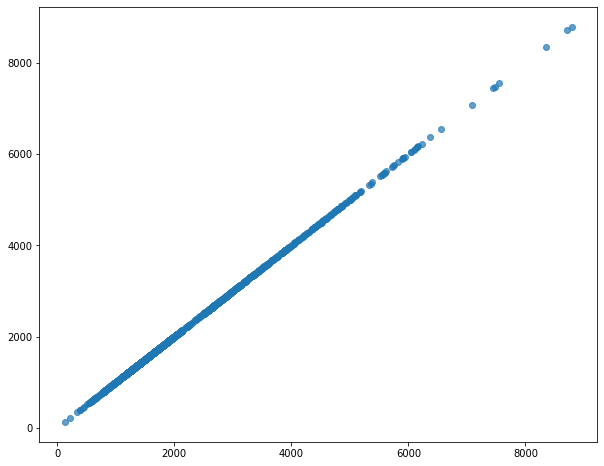

CROSS_SELL_SUCCESS


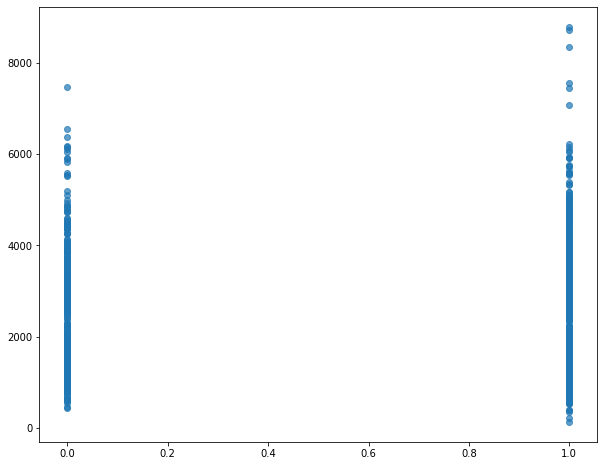

TOTAL_MEALS_ORDERED


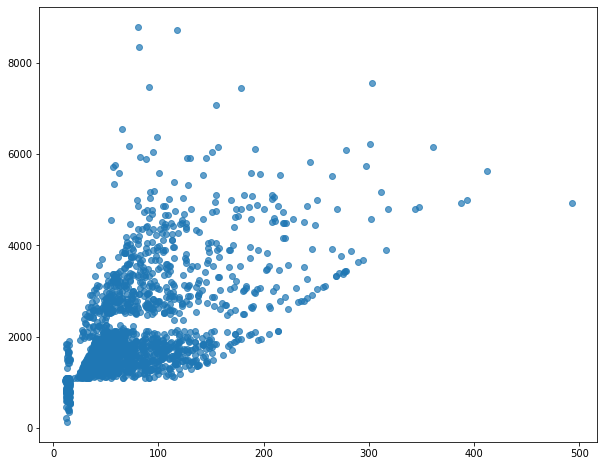

UNIQUE_MEALS_PURCH


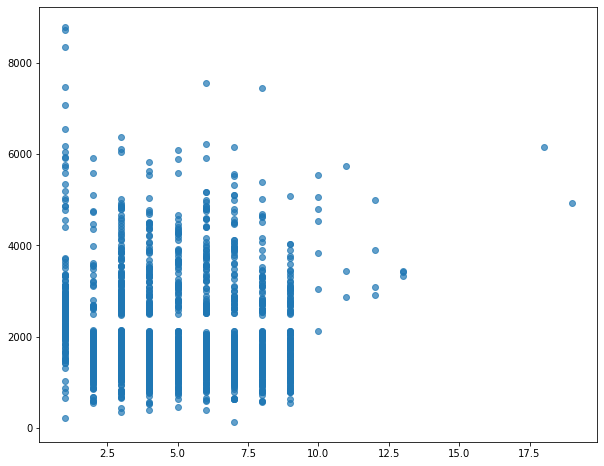

CONTACTS_W_CUSTOMER_SERVICE


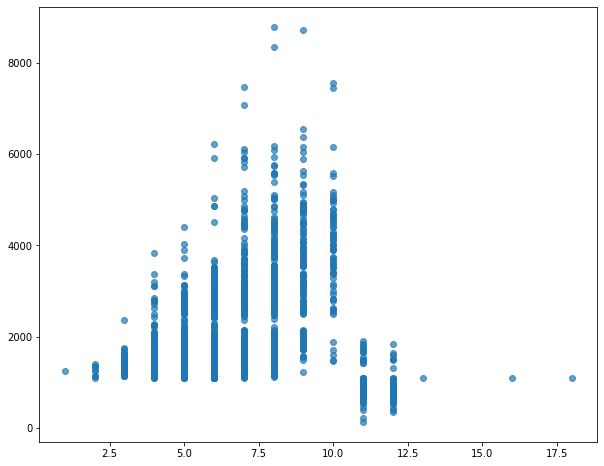

PRODUCT_CATEGORIES_VIEWED


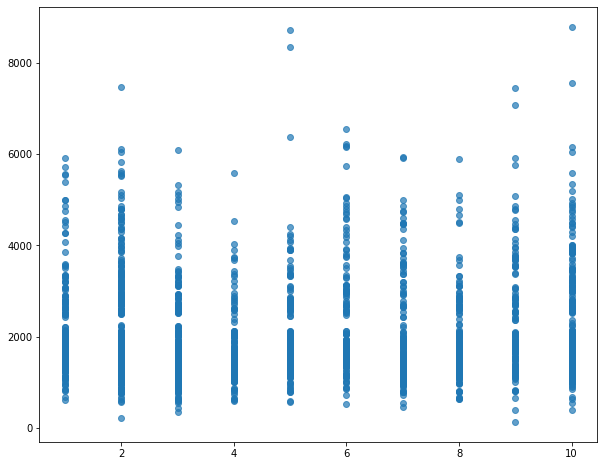

AVG_TIME_PER_SITE_VISIT


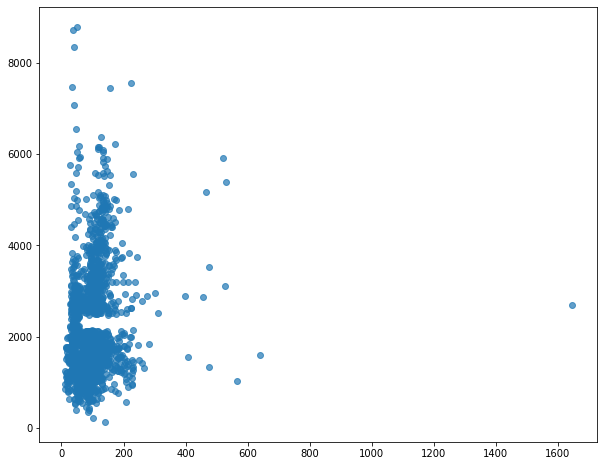

MOBILE_NUMBER


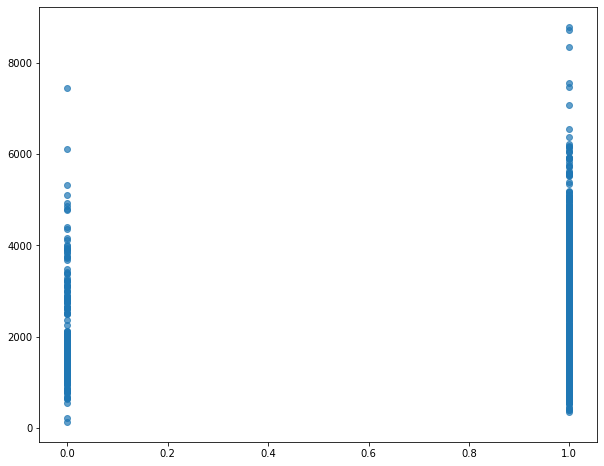

CANCELLATIONS_BEFORE_NOON


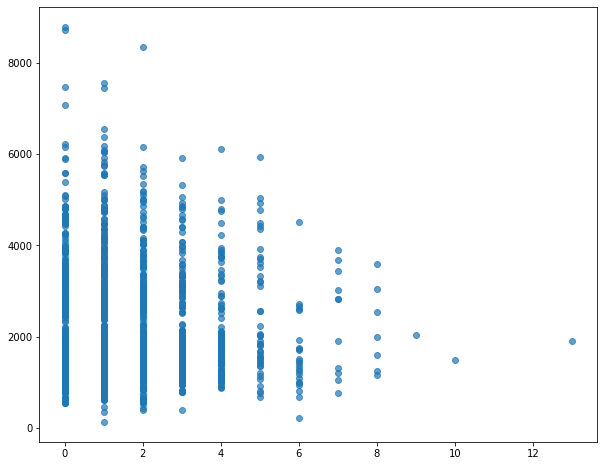

CANCELLATIONS_AFTER_NOON


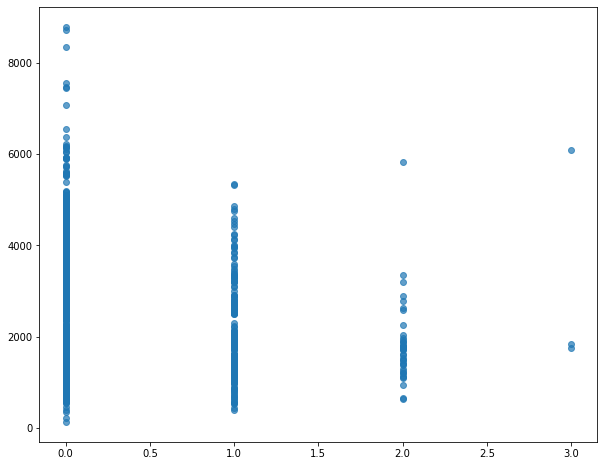

TASTES_AND_PREFERENCES


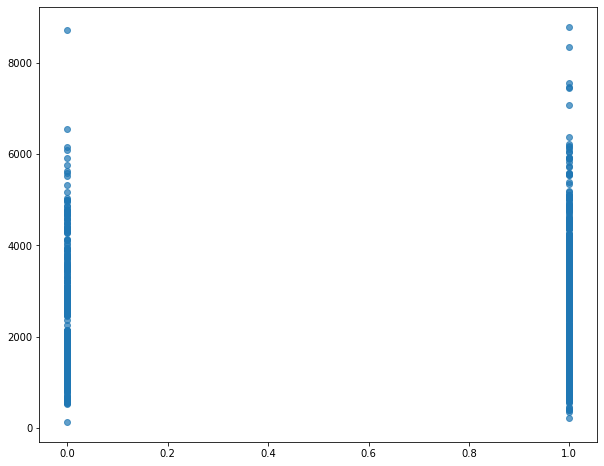

MOBILE_LOGINS


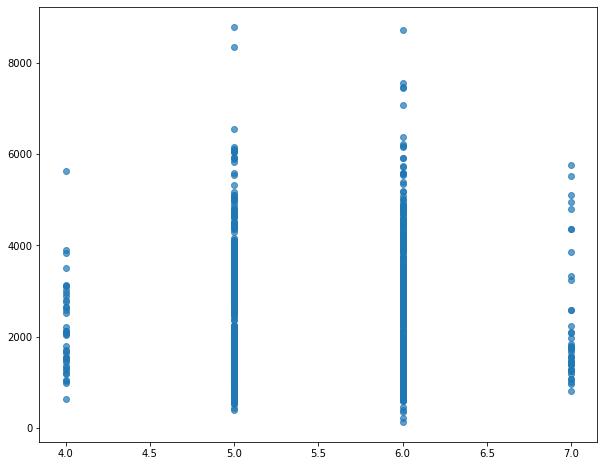

PC_LOGINS


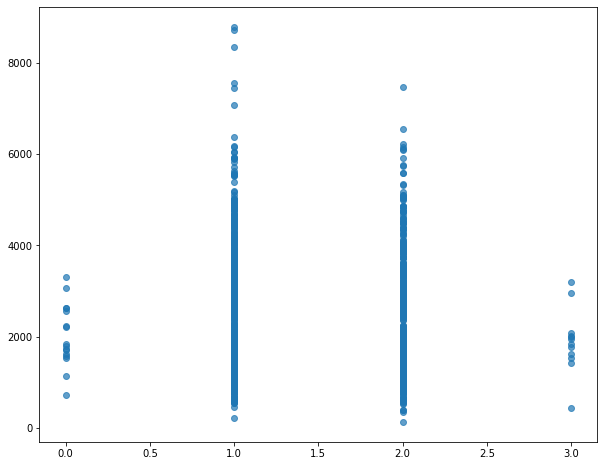

WEEKLY_PLAN


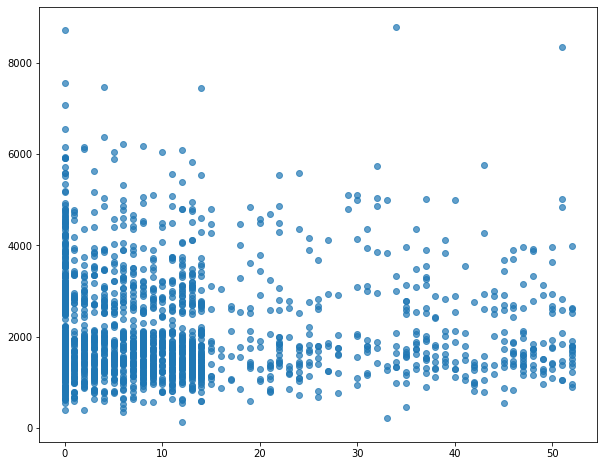

EARLY_DELIVERIES


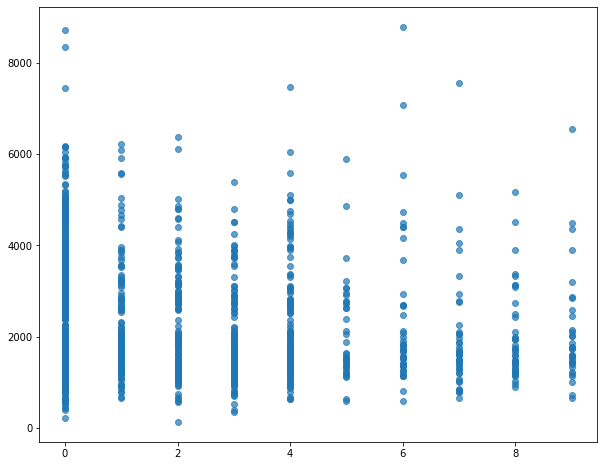

LATE_DELIVERIES


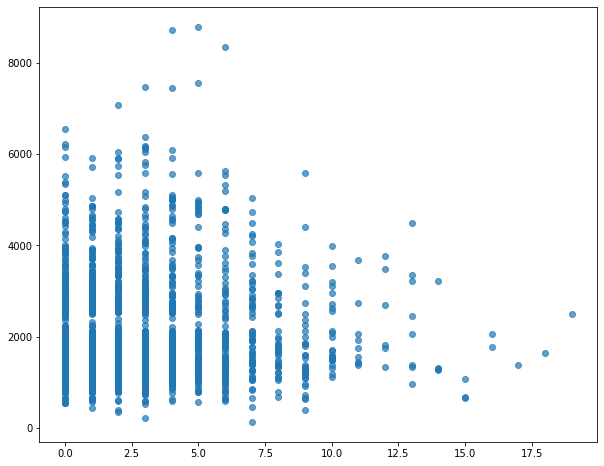

PACKAGE_LOCKER


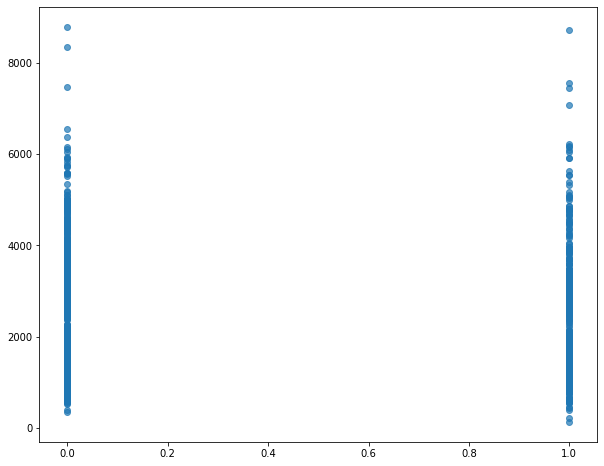

REFRIGERATED_LOCKER


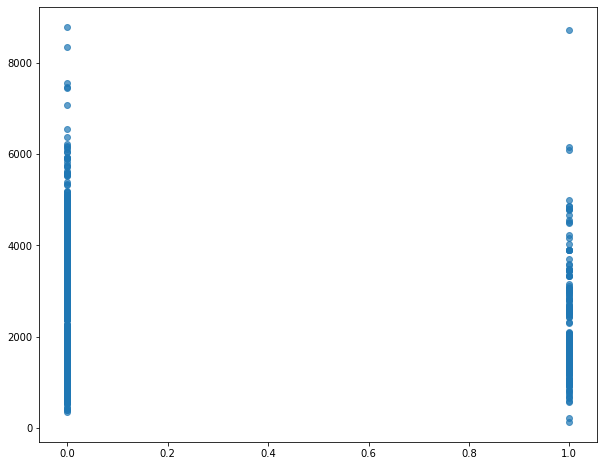

FOLLOWED_RECOMMENDATIONS_PCT


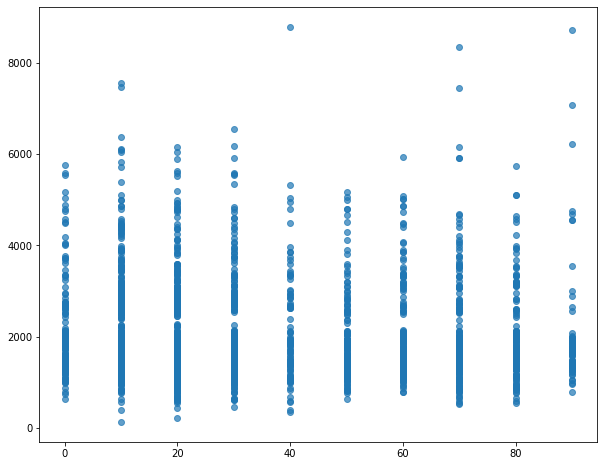

AVG_PREP_VID_TIME


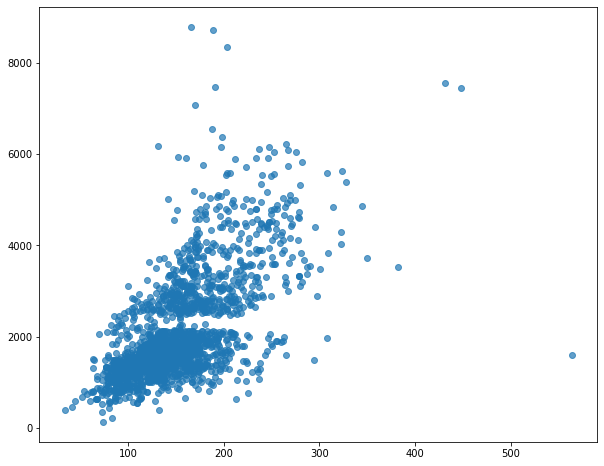

LARGEST_ORDER_SIZE


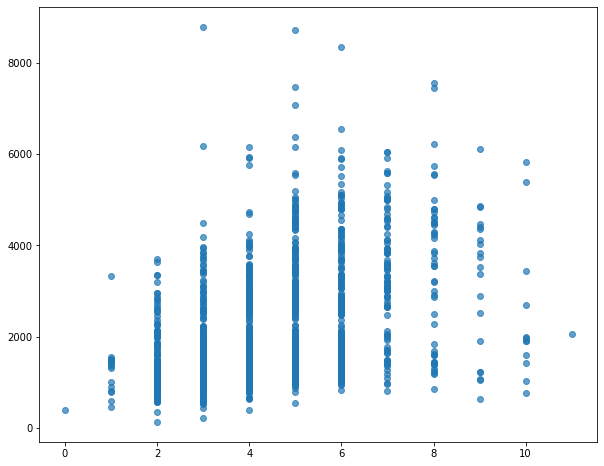

MASTER_CLASSES_ATTENDED


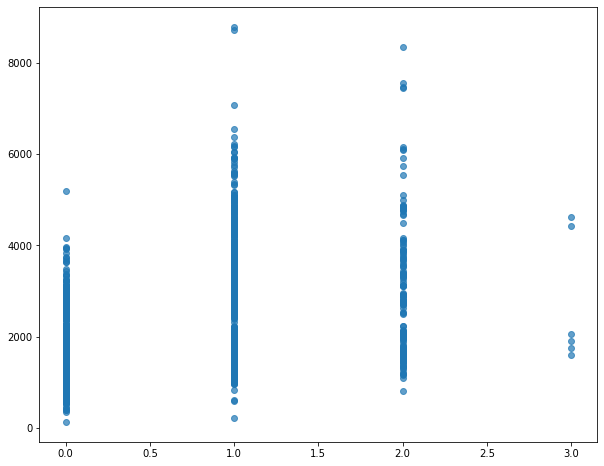

MEDIAN_MEAL_RATING


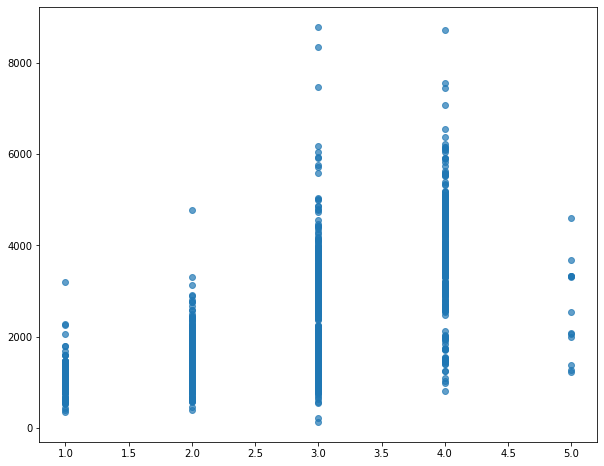

AVG_CLICKS_PER_VISIT


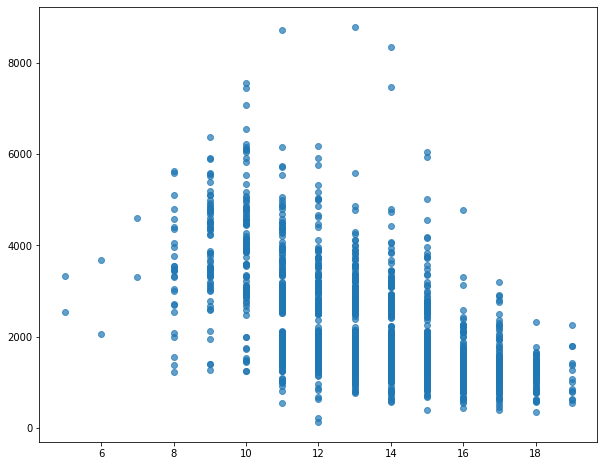

TOTAL_PHOTOS_VIEWED


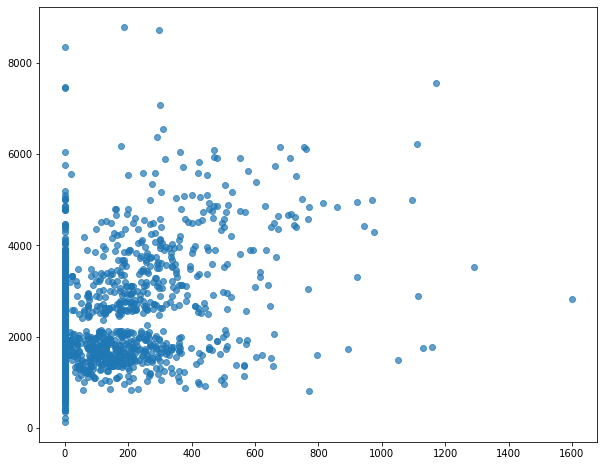

AVG_PRICE_PER_MEAL


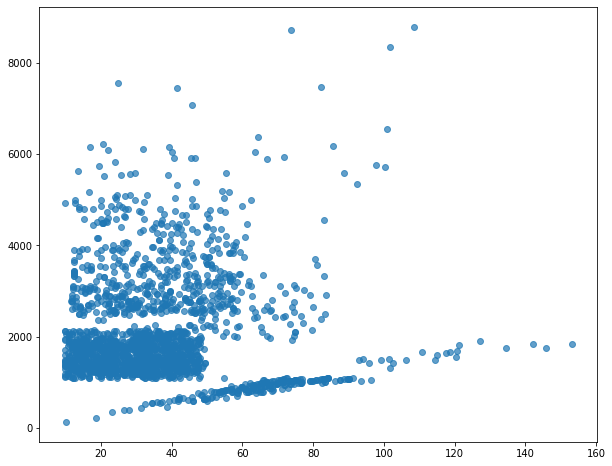

out_TOTAL_MEALS_ORDERED


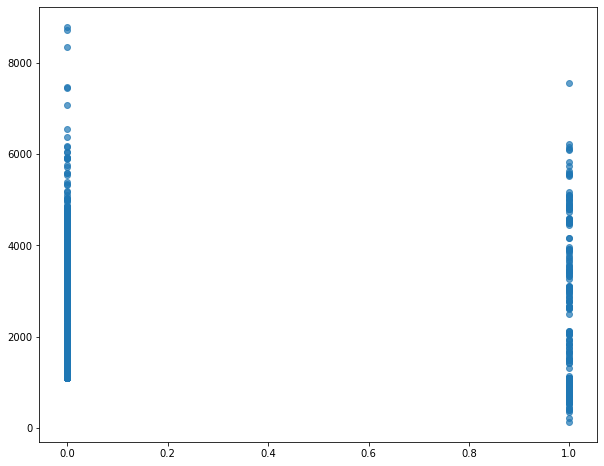

out_UNIQUE_MEALS_PURCH


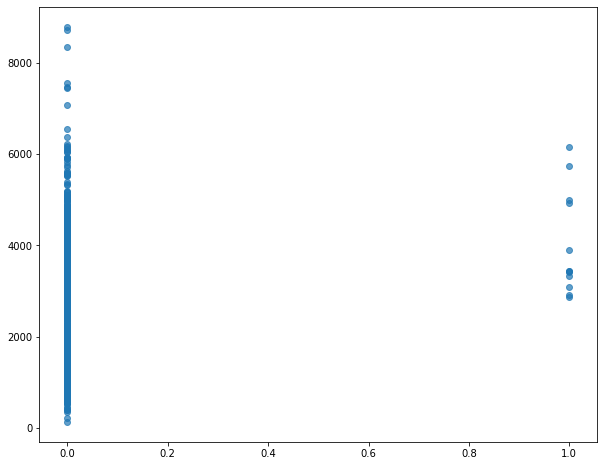

out_CONTACTS_W_CUSTOMER_SERVICE


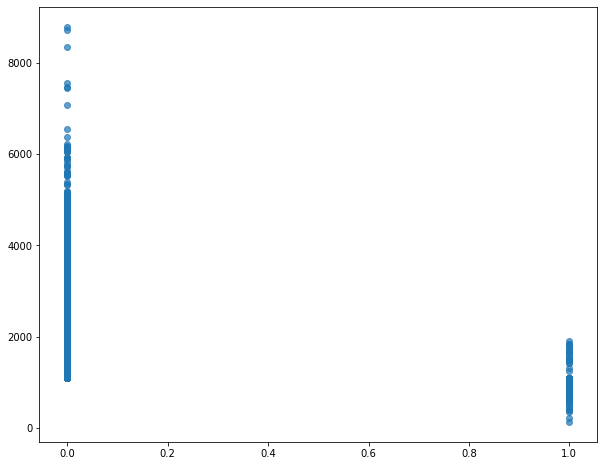

out_AVG_TIME_PER_SITE_VISIT


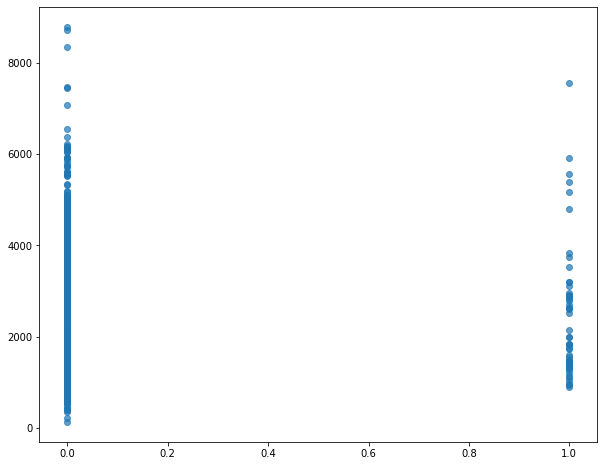

out_CANCELLATIONS_BEFORE_NOON


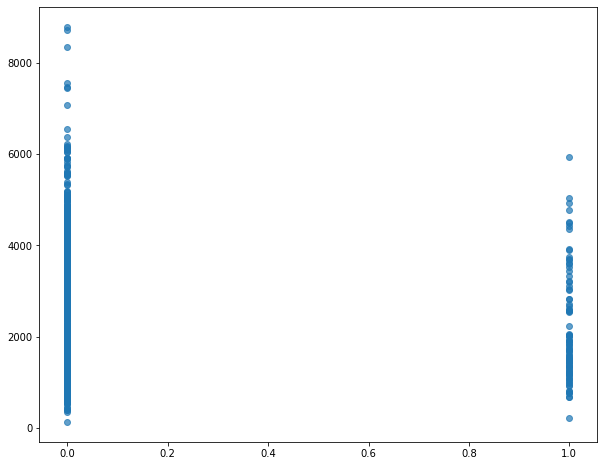

out_CANCELLATIONS_AFTER_NOON


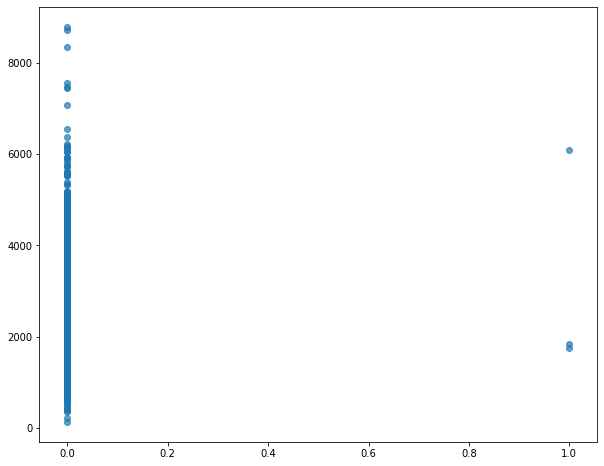

out_MOBILE_LOGINS


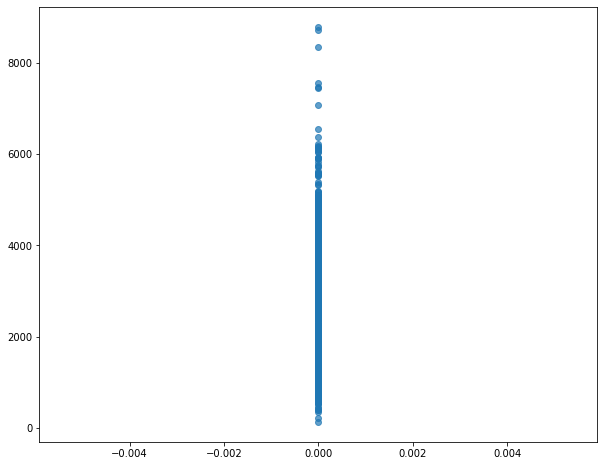

out_PC_LOGINS


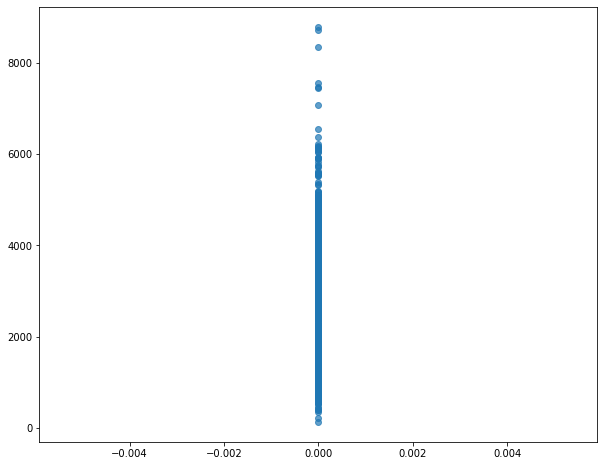

out_WEEKLY_PLAN


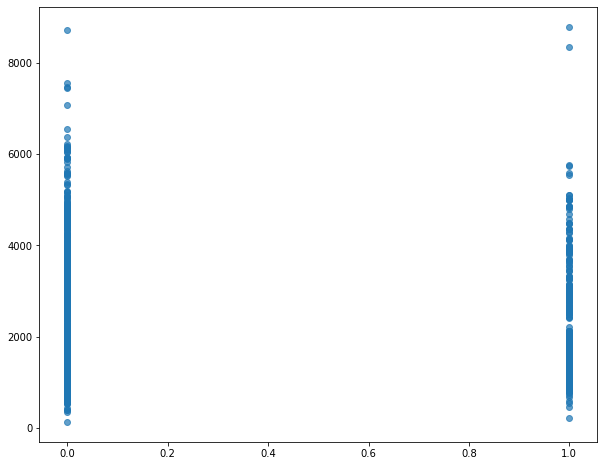

out_LATE_DELIVERIES


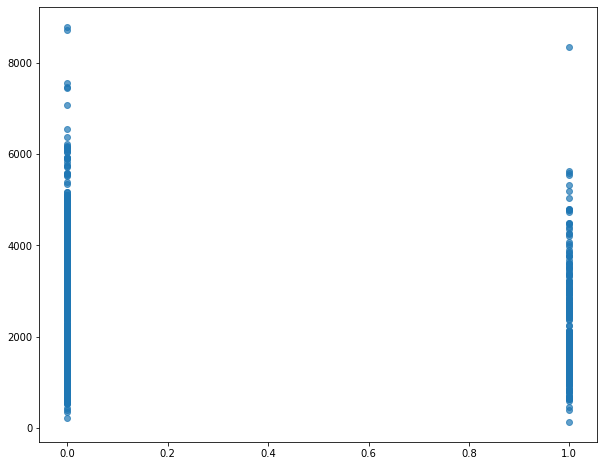

out_AVG_PREP_VID_TIME


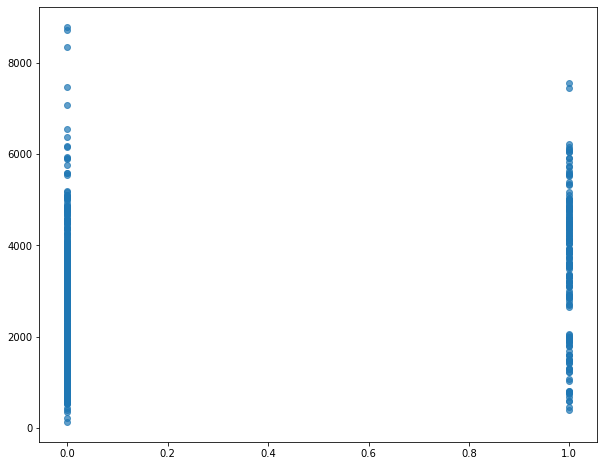

out_LARGEST_ORDER_SIZE


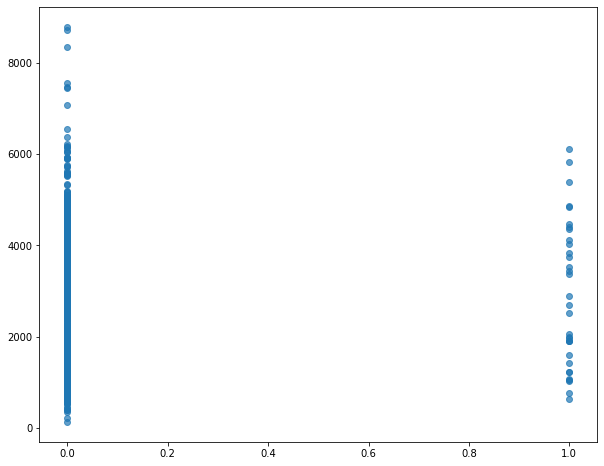

out_MASTER_CLASSES_ATTENDED


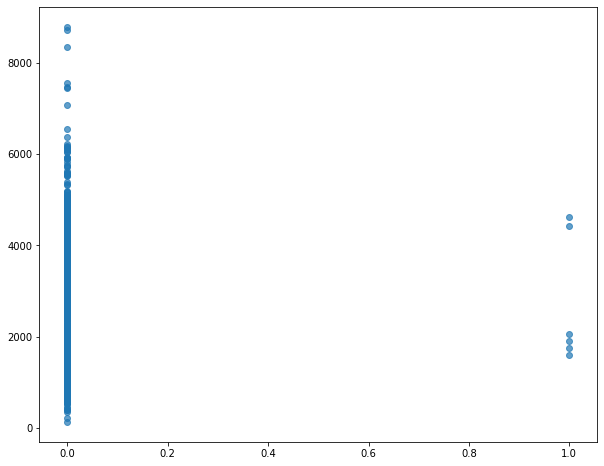

out_AVG_CLICKS_PER_VISIT


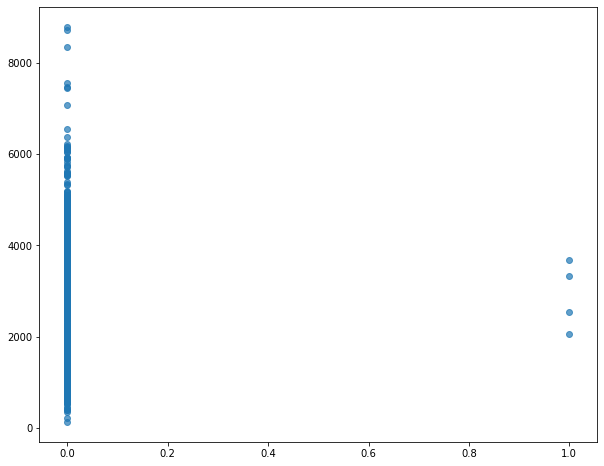

out_TOTAL_PHOTOS_VIEWED


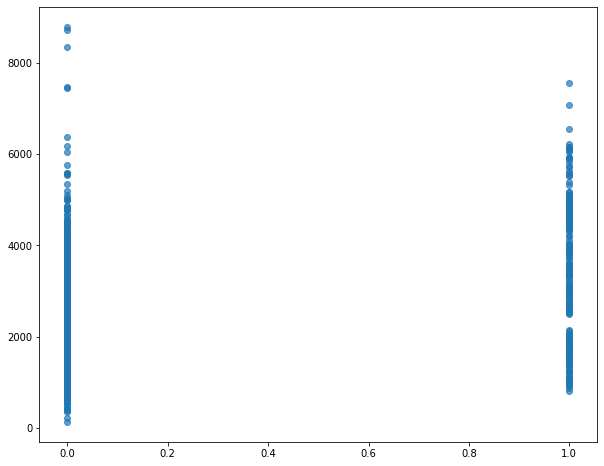

out_AVG_PRICE_PER_MEAL


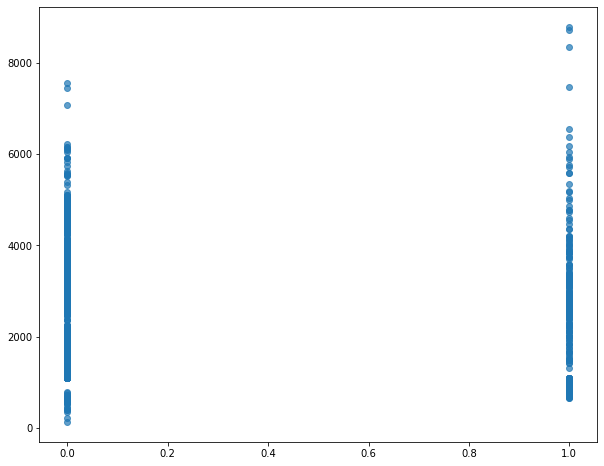

change_TOTAL_PHOTOS_VIEWED


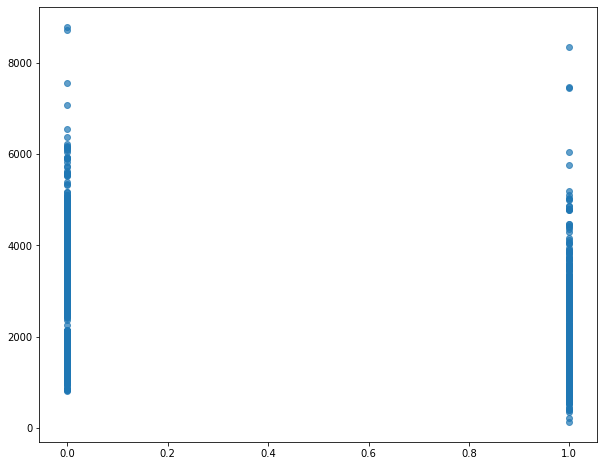

change_WEEKLY_PLAN


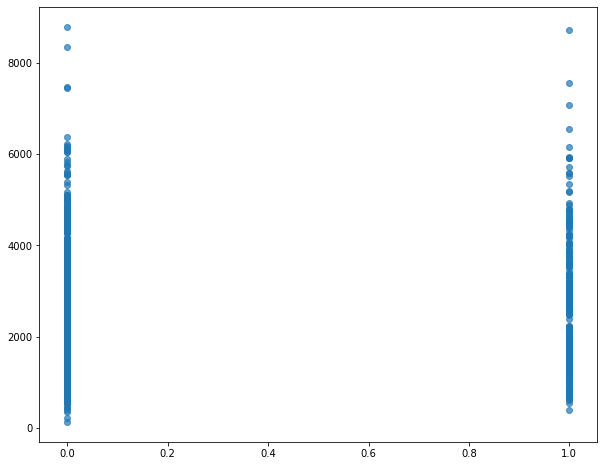

REVENUE                            1.00
AVG_PREP_VID_TIME                  0.64
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
TOTAL_PHOTOS_VIEWED                0.47
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.44
out_AVG_PREP_VID_TIME              0.42
out_TOTAL_PHOTOS_VIEWED            0.39
AVG_TIME_PER_SITE_VISIT            0.14
out_UNIQUE_MEALS_PURCH             0.13
CONTACTS_W_CUSTOMER_SERVICE        0.10
out_LARGEST_ORDER_SIZE             0.09
out_AVG_TIME_PER_SITE_VISIT        0.05
out_CANCELLATIONS_AFTER_NOON       0.04
out_MASTER_CLASSES_ATTENDED        0.03
PRODUCT_CATEGORIES_VIEWED          0.03
MOBILE_NUMBER                      0.03
out_AVG_CLICKS_PER_VISIT           0.03
change_WEEKLY_PLAN                 0.03
out_WEEKLY_PLAN                    0.03
MOBILE_LOGINS                      0.02
AVG_PRICE_PER_MEAL                 0.02
out_AVG_PRICE_PER_MEAL             0.02
out_CANCELLATIONS_BEFORE_NOON      0.02


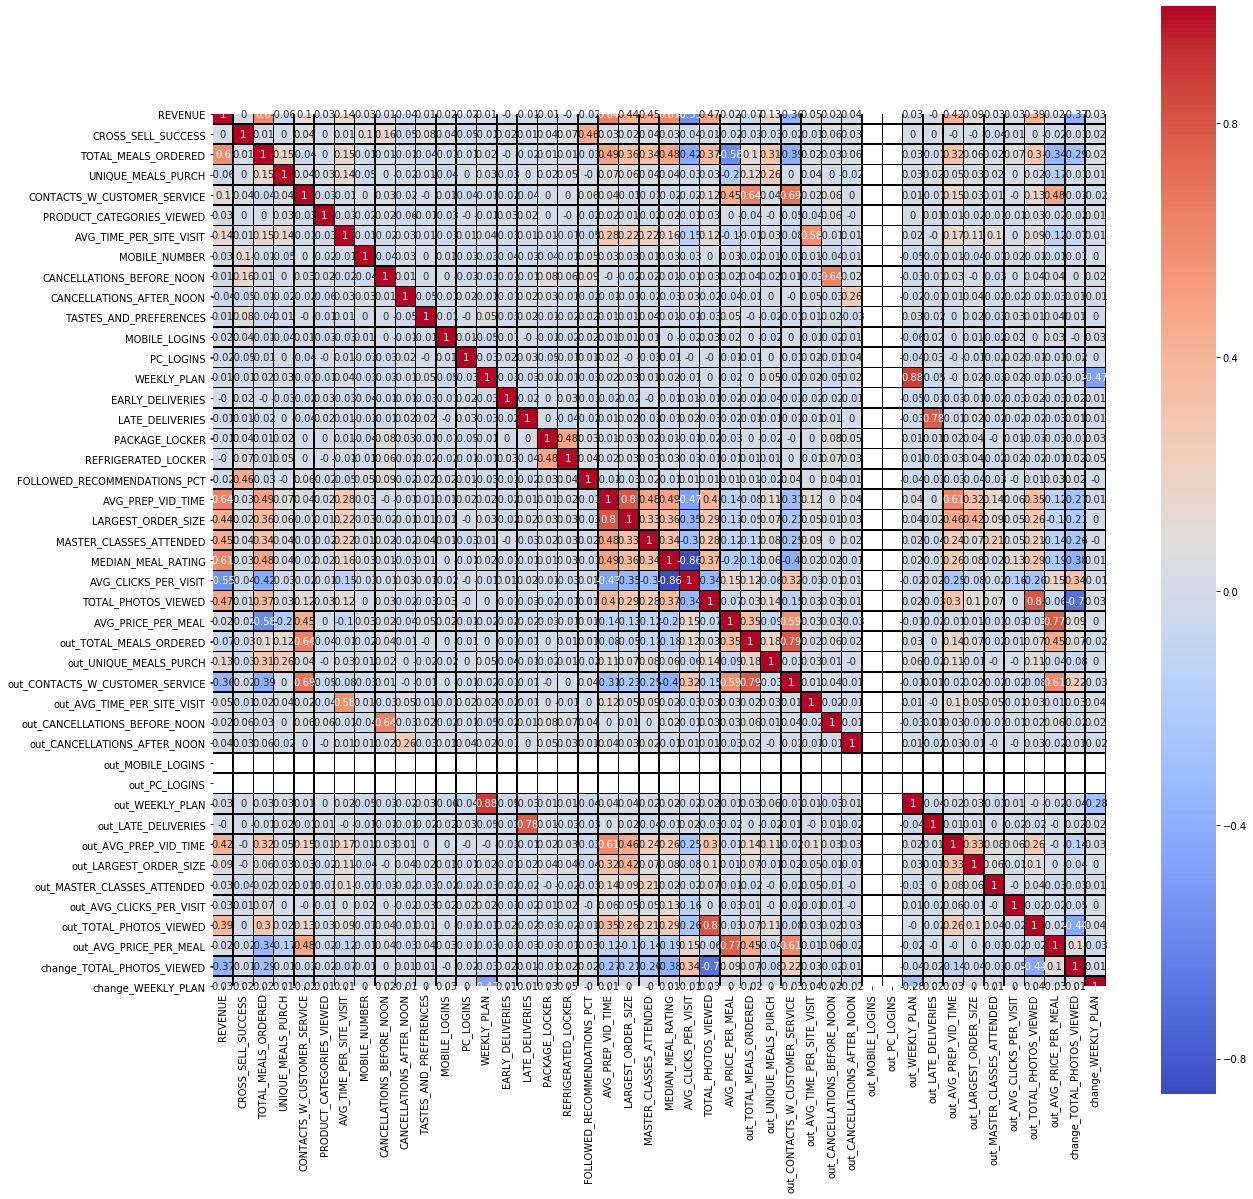

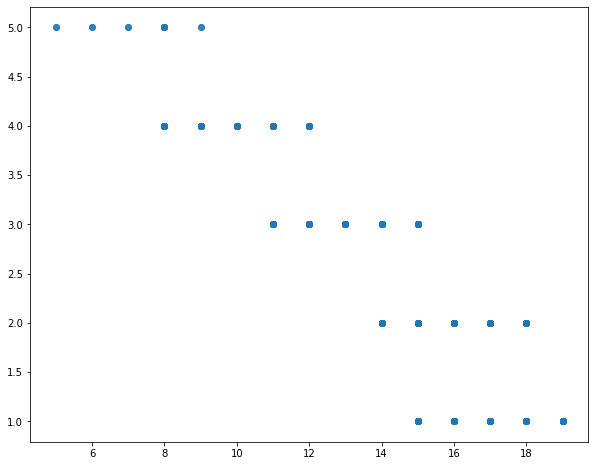

chef['CROSS_SELL_SUCCESS'] +
chef['TOTAL_MEALS_ORDERED'] +
chef['UNIQUE_MEALS_PURCH'] +
chef['CONTACTS_W_CUSTOMER_SERVICE'] +
chef['PRODUCT_CATEGORIES_VIEWED'] +
chef['AVG_TIME_PER_SITE_VISIT'] +
chef['MOBILE_NUMBER'] +
chef['CANCELLATIONS_BEFORE_NOON'] +
chef['CANCELLATIONS_AFTER_NOON'] +
chef['TASTES_AND_PREFERENCES'] +
chef['MOBILE_LOGINS'] +
chef['PC_LOGINS'] +
chef['WEEKLY_PLAN'] +
chef['EARLY_DELIVERIES'] +
chef['LATE_DELIVERIES'] +
chef['PACKAGE_LOCKER'] +
chef['REFRIGERATED_LOCKER'] +
chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef['AVG_PREP_VID_TIME'] +
chef['LARGEST_ORDER_SIZE'] +
chef['MASTER_CLASSES_ATTENDED'] +
chef['MEDIAN_MEAL_RATING'] +
chef['AVG_CLICKS_PER_VISIT'] +
chef['TOTAL_PHOTOS_VIEWED'] +
chef['AVG_PRICE_PER_MEAL'] +
chef['out_TOTAL_MEALS_ORDERED'] +
chef['out_UNIQUE_MEALS_PURCH'] +
chef['out_CONTACTS_W_CUSTOMER_SERVICE'] +
chef['out_AVG_TIME_PER_SITE_VISIT'] +
chef['out_CANCELLATIONS_BEFORE_NOON'] +
chef['out_CANCELLATIONS_AFTER_NOON'] +
chef['out_MOBILE_LOGINS'] +

In [7]:
# Developed a new variable presenting the avg. price per meal per customer
# which became very important for the model later
chef['AVG_PRICE_PER_MEAL'] = chef['REVENUE']/chef['TOTAL_MEALS_ORDERED']


# In order to make it as a loop I had to remove all non-numeric variables 
chef_numb = chef.drop(['NAME','FIRST_NAME',
                       'FAMILY_NAME', 'EMAIL'],
                        axis = 1)


    
# Outliers thresholds determined based on the histograms and scatterplots
total_meals_ord_hi   = 180
total_meals_ord_lo   = 25
unique_meals_pur_hi  = 10
contact_w_custo_s_lo = 2
contact_w_custo_s_hi = 10
avg_time_per_site_hi = 210
cancel_bef_noon_hi   = 4
cancel_aft_noon_hi   = 2
mobile_log_lo        = 4
mobile_log_hi        = 7
pc_log_hi            = 3
weekly_plan_hi       = 15
late_deliv_hi        = 5
avg_prep_vid_time_hi = 220
avg_prep_vid_time_lo = 65
largest_order_hi     = 8
master_class_hi      = 2
avg_click_per_lo     = 7
total_photo_hi       = 300
avg_price_per_m_hi   = 50



## Developing threshold for outliers

# TOTAL MEALS ORDERED
chef['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] 
                                                      > total_meals_ord_hi]
condition_lo = chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] 
                                                      < total_meals_ord_lo]

chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)
chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)

# UNIQUE MEALS 
chef['out_UNIQUE_MEALS_PURCH']  = 0
condition_hi = chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][chef['UNIQUE_MEALS_PURCH'] 
                                                     > unique_meals_pur_hi]

chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
chef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] 
                                                              > contact_w_custo_s_hi]
condition_lo = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] 
                                                              < contact_w_custo_s_lo]

chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                                value      = 1,
                                                inplace    = True)
chef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                                value      = 1,
                                                inplace    = True)

# AVG TIME PER SITE VISIT
chef['out_AVG_TIME_PER_SITE_VISIT']  = 0
condition_hi = chef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chef['AVG_TIME_PER_SITE_VISIT'] 
                                                          > avg_time_per_site_hi]

chef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# CANCELLATIONS_BEFORE_NOON
chef['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] 
                                                            > cancel_bef_noon_hi]

chef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

# CANCELLATIONS_AFTER_NOON
chef['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] 
                                                           > cancel_aft_noon_hi]

chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

# MOBILE_LOGINS
chef['out_MOBILE_LOGINS'] = 0
condition_hi = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] 
                                                > mobile_log_hi ]
condition_lo = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] 
                                                < mobile_log_lo ]

chef['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                  value      = 1,
                                  inplace    = True)
chef['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                  value      = 1,
                                  inplace    = True)

# PC_LOGINS
chef['out_PC_LOGINS'] = 0
condition_hi = chef.loc[0:,'out_PC_LOGINS'][chef['PC_LOGINS'] 
                                            > pc_log_hi ]

chef['out_PC_LOGINS'].replace(to_replace = condition_hi,
                              value      = 1,
                              inplace    = True)

# WEEKLY_PLAN
chef['out_WEEKLY_PLAN'] = 0
condition_hi = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] 
                                              > weekly_plan_hi]

chef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LATE_DELIVERIES
chef['out_LATE_DELIVERIES'] = 0
condition_hi = chef.loc[0:,'out_LATE_DELIVERIES'][chef['LATE_DELIVERIES'] 
                                                  > late_deliv_hi]

chef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME
chef['out_AVG_PREP_VID_TIME'] = 0
condition_hi = chef.loc[0:,'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] 
                                                    > avg_prep_vid_time_hi]
condition_lo = chef.loc[0:,'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] 
                                                    < avg_prep_vid_time_lo]

chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                      value      = 1,
                                      inplace    = True)
chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                      value      = 1,
                                      inplace    = True)

# LARGEST_ORDER_SIZE
chef['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = chef.loc[0:,'out_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] 
                                                     > largest_order_hi]

chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)

# MASTER_CLASSES_ATTENDED
chef['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = chef.loc[0:,'out_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] 
                                                          > master_class_hi]

chef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# AVG_CLICKS_PER_VISIT
chef['out_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = chef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT'] 
                                                       < avg_click_per_lo]

chef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)

# TOTAL_PHOTOS_VIEWED
chef['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] 
                                                      > total_photo_hi]

chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# AVG_PRICE_PER_MEAL
chef['out_AVG_PRICE_PER_MEAL'] = 0
condition_hi = chef.loc[0:,'out_AVG_PRICE_PER_MEAL'][chef['AVG_PRICE_PER_MEAL'] 
                                                     > avg_price_per_m_hi]

chef['out_AVG_PRICE_PER_MEAL'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)


# for loop to plot scatterplots with y = REVENUE and x = all variables
for col in chef_numb:
    
    fig, ax = plt.subplots(figsize = (10, 8))
    
    plt.scatter(x = chef_numb[col], y = 'REVENUE',
                data = chef_numb, alpha = 0.7)
    xlabel = print(f'{col}')
    plt.show()



# Developing zero inflation variables where 0 had a big impact
total_photo_viewed_change_at = 0 # zero inflated
weekly_plan_change_at        = 0 # zero inflated



chef['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = chef.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] 
                                                      == total_photo_viewed_change_at]

chef['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                           value      = 1,
                                           inplace    = True)

chef['change_WEEKLY_PLAN'] = 0
condition = chef.loc[0:,'change_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] 
                                              == weekly_plan_change_at]

chef['change_WEEKLY_PLAN'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# Correlation chart with variables correlation with REVENUE
# Correlation insight were key to find the 2 important insight
chef_corr1 = chef.corr().round(2)

# Heatmap gave a good overview over correlation within the dataset
fig, ax = plt.subplots(figsize  = (20,20))

sns.heatmap(chef_corr1, cmap = 'coolwarm',
            square = True, annot = True,
            linecolor = 'black', linewidths = 0.5)

# Looking at correlation with REVENUE
print(chef_corr1['REVENUE'].sort_values(ascending=False))

# Finding correlation for MEDIAN_MEAL_RATING triggering the insight
print(chef_corr1['MEDIAN_MEAL_RATING'].sort_values(ascending=False))
    
    
    
# Model showing the relationship between median rating and avg click per visit
# essential for the insight and recommendation
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(x = 'AVG_CLICKS_PER_VISIT', y = 'MEDIAN_MEAL_RATING',
                data = chef_numb, alpha = 0.7)
plt.show()

    
# Dummie variables from the email domain.
# Dataset has to be a DataFrame for .iterrows() to work
chef_email       = pd.DataFrame(chef['EMAIL'])

placeholder_lst  = []

for index, col in chef_email.iterrows():
    split_email  = chef_email.loc[index, 'EMAIL'].split(sep = '@')
    
    placeholder_lst.append(split_email)
    
email_df         = pd.DataFrame(placeholder_lst)
email_df.columns = ['name', 'domain']

# Domain groups
personal_domain     = ['@gmail.com', '@yahoo.com','@protonmail.com']
professional_domain = ['@mmm.com', '@amex.com','@apple.com',
                      '@boeing.com','@caterpillar.com',
                      '@chevron.com','@cisco.com','@cocacola.com',
                      '@disney.com','@dupont.com','@exxon.com',
                      '@ge.org','@goldmansacs.com','@homedepot.com',
                      '@ibm.com','@intel.com','@jnj.com',
                      '@jpmorgan.com','@mcdonalds.com','@merck.com',
                      '@microsoft.com','@nike.com','@pfizer.com',
                      '@pg.com','@travelers.com','@unitedtech.com',
                      '@unitedhealth.com','@verizon.com','@visa.com',
                      '@walmart.com']
junk_domain         = ['@me.com', '@aol.com', '@hotmail.com', '@live.com',
                       '@msn.com','@passport.com']

# For loop categorising the different email domains
placeholder_lst = []

for domain in email_df['domain']:
    
    if '@' + domain in personal_domain:
        placeholder_lst.append('personal')
    elif '@' + domain in professional_domain:
        placeholder_lst.append('professional')
    else:
        placeholder_lst.append('junk')
        
# make the columns into a series to append it to original dataset        
email_df['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# Add the domain categories column to the original dataset 
chef['DOMAIN'] = email_df['DOMAIN_GROUP']

# Get dummies from the domain variable and drop the original column
one_hot_DOMAIN = pd.get_dummies(chef['DOMAIN'])

# Remove the old and add the 3 new columns
chef           = chef.drop('DOMAIN', axis = 1)
chef           = chef.join([one_hot_DOMAIN])



chef_numb = chef.drop(['REVENUE', 'NAME', 'EMAIL', 
                       'FIRST_NAME','FAMILY_NAME'], axis = 1)

# For loop to print the numeric variable in the right format for Statmodel
for col in chef_numb:
    print(f"chef['{col}'] +")



## Variable selection and Standardization Scaler
Backward selection of variables based on p-value. P-value threshold = 0.1

### Removed variables
CROSS_SELL_SUCCESS, UNIQUE_MEALS_PURCH, PRODUCT_CATEGORIES_VIEWED,
AVG_TIME_PER_SITE_VISIT, MOBILE_NUMBER, CANCELLATIONS_BEFORE_NOON,
CANCELLATIONS_AFTER_NOON, TASTES_AND_PREFERENCES, MOBILE_LOGINS,
PC_LOGINS, WEEKLY_PLAN, PACKAGE_LOCKER, REFRIGERATED_LOCKER,
out_CONTACTS_W_CUSTOMER_SERVICE, out_AVG_TIME_PER_SITE_VISIT,
out_CANCELLATIONS_BEFORE_NOON, out_CANCELLATIONS_AFTER_NOON,
out_MOBILE_LOGINS, out_PC_LOGINS, out_WEEKLY_PLAN, out_LATE_DELIVERIES,
out_LARGEST_ORDER_SIZE, out_MASTER_CLASSES_ATTENDED, 
out_AVG_PRICE_PER_MEAL, change_TOTAL_PHOTOS_VIEWED, change_WEEKLY_PLAN


In [11]:
# Statsmodel to build a linear regression with p-values
lm_fitted_chef = smf.ols(formula = """chef['REVENUE']~
chef['TOTAL_MEALS_ORDERED'] +
chef['CONTACTS_W_CUSTOMER_SERVICE'] +
chef['EARLY_DELIVERIES'] +
chef['LATE_DELIVERIES'] +
chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef['AVG_PREP_VID_TIME'] +
chef['LARGEST_ORDER_SIZE'] +
chef['MASTER_CLASSES_ATTENDED'] +
chef['MEDIAN_MEAL_RATING'] +
chef['AVG_CLICKS_PER_VISIT'] +
chef['TOTAL_PHOTOS_VIEWED'] +
chef['AVG_PRICE_PER_MEAL'] +
chef['out_TOTAL_MEALS_ORDERED'] +
chef['out_UNIQUE_MEALS_PURCH'] +
chef['out_AVG_PREP_VID_TIME'] +
chef['out_AVG_CLICKS_PER_VISIT'] +
chef['out_TOTAL_PHOTOS_VIEWED'] +
chef['out_AVG_PRICE_PER_MEAL'] +
chef['junk'] +
chef['personal'] +
chef['professional']""", data = chef)

result_fitted_chef = lm_fitted_chef.fit()

result_fitted_chef.summary()


# declaring set of x-variables
x_variables = ['TOTAL_MEALS_ORDERED','CONTACTS_W_CUSTOMER_SERVICE',
                'EARLY_DELIVERIES','LATE_DELIVERIES', 'AVG_PREP_VID_TIME',
                'FOLLOWED_RECOMMENDATIONS_PCT','LARGEST_ORDER_SIZE',
                'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
                'AVG_PRICE_PER_MEAL', 'out_TOTAL_MEALS_ORDERED', 
                'out_UNIQUE_MEALS_PURCH','out_AVG_PREP_VID_TIME', 
                'out_AVG_CLICKS_PER_VISIT', 'out_TOTAL_PHOTOS_VIEWED',
                'out_AVG_PRICE_PER_MEAL','junk', 'personal', 'professional']

# Assigning only REVENUE as target variable
target_data      = chef.loc[ : , 'REVENUE']

# All other variables are explanatory
explanatory_data = chef.loc[ : , x_variables]


# The data was standardized the dataset with StandardScaler() but it had no effect on 
# the final model so I decided not to include it to save space and time

scaler = StandardScaler()

scaler.fit(chef_data)

X_scaled = scaler.transform(chef_data)

X_scaled_df = pd.DataFrame(X_scaled)

# adding the column name back to the standardized dataframe
X_scaled_df.columns = explanatory_data.columns

In [ ]:
## Split data set into a TRAIN and TEST set

In [12]:
# The code to divide dataset into a train set (75%) and test set (25%)
# with the random seed number as 222
X_train, X_test, y_train, y_test = train_test_split(
            explanatory_data,
            target_data,
            test_size = 0.25,
            random_state = 222)

## Model building

### Regressor models:
- Linear Regression
- Ridge
- Lasso 
- Gradient Boosting 
- K-Nearest Neighbor

In [13]:
################################################################################
# Final Model (instantiate, fit, and predict)
################################################################################

## Linear Regression 
lr      = LinearRegression()

# FITTING the training data
lr_fit  = lr.fit(X_train, y_train)

# PREDICTING on test data
lr_pred = lr_fit.predict(X_test)

# saving scoring data for table
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)


## Ridge Regression
ridge_model = Ridge()

# FITTING the training data
ridge_fit   = ridge_model.fit(X_train, y_train)

# PREDICTING on test data
ridge_pred  = ridge_model.predict(X_test)

# saving scoring data for table
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)


# Lasso Regression
lasso_model = Lasso()

# FITTING the training data
lasso_fit   = lasso_model.fit(X_train, y_train)

# PREDICTING on test data
lasso_pred  = lasso_model.predict(X_test)

# saving scoring data for table
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)


# Gradient Boosting Regressor
Gboost      = GradientBoostingRegressor(random_state = 123)

# FITTING the training data
Gboost_fit  = Gboost.fit(X_train, y_train)

# PREDICTING on test data
Gboost_pred = Gboost.predict(X_test)

# saving scoring data for table
Gboost_train_score = Gboost.score(X_train, y_train).round(4)
Gboost_test_score  = Gboost.score(X_test, y_test).round(4)


## Finding the best number of neighbors for KNN
training_accuracy = []
test_accuracy     = []


# Trying n_neighbors between 1 and 50 to see which one gives the highest r^2
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1


## KNearestNeighbor Regression
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)

# FITTING to the training data
knn_reg.fit(X_train, y_train)


# PREDICTING on test data
knn_reg_pred = knn_reg.predict(X_test)

# saving scoring data for table
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)

# Comparing table

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}          {ridge_test_score}
Lasso      {lasso_train_score}          {lasso_test_score}
Gboost     {Gboost_train_score}       -> {Gboost_test_score}
KNN        {knn_reg_score_train}          {knn_reg_score_test}
""")

print(f'The best model is Gradient Boosting Regressor: {Gboost_test_score}')


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.81           0.8054
Ridge      0.8099          0.805
Lasso      0.8093          0.8042
Gboost     0.9862       -> 0.9512
KNN        0.8597          0.6977

The best model is Gradient Boosting Regressor: 0.9512
